# Chapter 7 : Signal Processing and Time Series

In [1]:
import pkgutil as pu
import numpy as np
import matplotlib as mpl
import scipy as sp
import pandas as pd
import pydoc
import statsmodels as sm
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6

In [2]:
print("Statsmodels version", sm.__version__)

def clean(astr):
   s = astr
   # remove multiple spaces
   s = ' '.join(s.split())
   s = s.replace('=','')

   return s

def print_desc(prefix, pkg_path):
   for pkg in pu.iter_modules(path=pkg_path):
      name = prefix + "." + pkg[1]

      if pkg[2] == True:
         try:
            docstr = pydoc.plain(pydoc.render_doc(name))
            docstr = clean(docstr)
            start = docstr.find("DESCRIPTION")
            docstr = docstr[start: start + 140]
            print(name, docstr)
         except:
            continue

print("\n")
print_desc("statsmodels", sm.__path__)

Statsmodels version 0.11.1


statsmodels.base 
statsmodels.compat 
statsmodels.datasets 
statsmodels.discrete 
statsmodels.distributions 
statsmodels.duration 
statsmodels.emplike 
statsmodels.formula 
statsmodels.gam 
statsmodels.genmod 
statsmodels.graphics 
statsmodels.imputation 
statsmodels.interface 
statsmodels.iolib 
statsmodels.miscmodels 
statsmodels.multivariate 
statsmodels.nonparametric DESCRIPTION For an overview of this module, see docs/source/nonparametric.rst PACKAGE CONTENTS _kernel_base _smoothers_lowess api bandwidths
statsmodels.regression 
statsmodels.resampling 
statsmodels.robust 
statsmodels.sandbox 
statsmodels.src 
statsmodels.stats 
statsmodels.tests 
statsmodels.tools 
statsmodels.tsa 


In [6]:
print("Statsmodels version", pd.__version__)

Statsmodels version 1.1.0


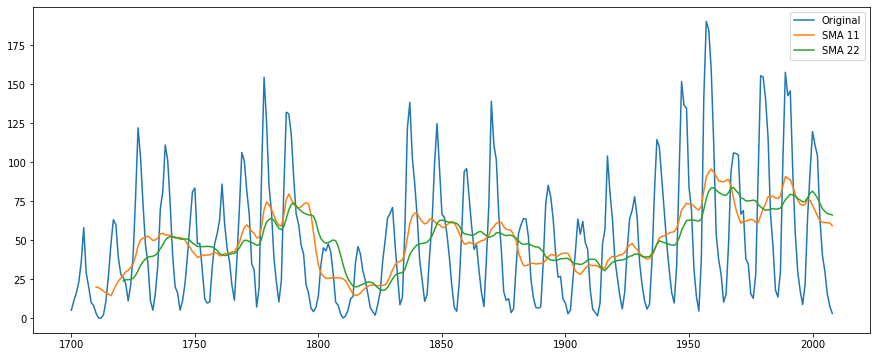

In [9]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
# from pandas.stats.moments import rolling_mean

data_loader = sm.datasets.sunspots.load_pandas()
df = data_loader.data
year_range = df["YEAR"].values
plt.plot(year_range, df["SUNACTIVITY"].values, label="Original")
plt.plot(year_range, df.rolling(window=11).mean()["SUNACTIVITY"].values, label="SMA 11")
plt.plot(year_range, df.rolling(window=22).mean()["SUNACTIVITY"].values, label="SMA 22")
plt.legend()
plt.show()

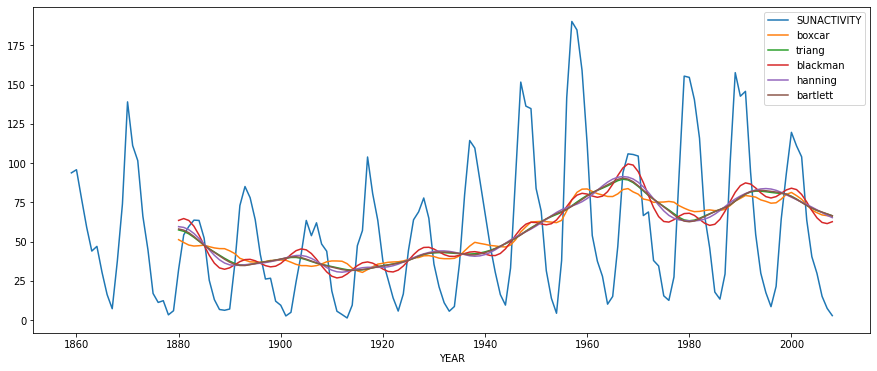

In [23]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
# from DataFrame.ewm import rolling_window
import pandas as pd

data_loader = sm.datasets.sunspots.load_pandas()
df = data_loader.data.tail(150)
df = pd.DataFrame({'SUNACTIVITY':df['SUNACTIVITY'].values}, index=df['YEAR'])
ax = df.plot()

def plot_window(wintype):
    df2 = df.rolling(window=22, win_type=wintype, center=False, axis=0).mean()
    df2.columns = [wintype]
    df2.plot(ax=ax)

plot_window('boxcar')
plot_window('triang')
plot_window('blackman')
plot_window('hanning')
plot_window('bartlett')
plt.show()

In [24]:
import statsmodels.api as sm
# from pandas.stats.moments import rolling_window
import pandas as pd
import statsmodels.tsa.stattools as ts
import numpy as np

def calc_adf(x, y):
    result = sm.OLS(x, y).fit()    
    return ts.adfuller(result.resid)

data_loader = sm.datasets.sunspots.load_pandas()
data = data_loader.data.values
N = len(data)

t = np.linspace(-2 * np.pi, 2 * np.pi, N)
sine = np.sin(np.sin(t))
print("Self ADF", calc_adf(sine, sine))

noise = np.random.normal(0, .01, N)
print("ADF sine with noise", calc_adf(sine, sine + noise))

cosine = 100 * np.cos(t) + 10
print("ADF sine vs cosine with noise", calc_adf(sine, cosine + noise))

print("Sine vs sunspots", calc_adf(sine, data))

Self ADF (5.098349840844293e-16, 0.958532086060056, 0, 308, {'1%': -3.45176116018037, '5%': -2.870970093607691, '10%': -2.571794416006072}, -21598.896016765088)
ADF sine with noise (-18.39232425232397, 2.1996418134056048e-30, 0, 308, {'1%': -3.45176116018037, '5%': -2.870970093607691, '10%': -2.571794416006072}, -1877.6967191311574)
ADF sine vs cosine with noise (-14.499627711587047, 5.961897238745156e-27, 16, 292, {'1%': -3.4529449243622383, '5%': -2.871489553425686, '10%': -2.572071437887033}, -10733.089002307732)
Sine vs sunspots (-6.724269181070093, 3.4210811915550897e-09, 16, 292, {'1%': -3.4529449243622383, '5%': -2.871489553425686, '10%': -2.572071437887033}, -1102.5867415291168)


In [25]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

data_loader = sm.datasets.sunspots.load_pandas()
data = data_loader.data["SUNACTIVITY"].values
y = data - np.mean(data)
norm = np.sum(y ** 2)
correlated = np.correlate(y, y, mode='full')/norm
res = correlated[int(len(correlated)/2):]

print(np.argsort(res)[-5:])
plt.plot(res)
plt.grid(True)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()
autocorrelation_plot(data)
plt.show()

ModuleNotFoundError: No module named 'pandas.tools'

In [ ]:
from scipy.optimize import leastsq
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

def model(p, x1, x10):
   p1, p10 = p
   return p1 * x1 + p10 * x10

def error(p, data, x1, x10):
   return data - model(p, x1, x10)

def fit(data):
   p0 = [.5, 0.5]
   params = leastsq(error, p0, args=(data[10:], data[9:-1], 
data[:-10]))[0]
   return params

data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values

cutoff = int(.9 * len(sunspots))
params = fit(sunspots[:cutoff])
print("Params", params)

pred = params[0] * sunspots[cutoff-1:-1] + params[1] * sunspots[cutoff-10:-10]
actual = sunspots[cutoff:]
print("Root mean square error", np.sqrt(np.mean((actual - pred) ** 2)))
print("Mean absolute error", np.mean(np.abs(actual - pred)))
print("Mean absolute percentage error", 100 * 
np.mean(np.abs(actual - pred)/actual))
mid = (actual + pred)/2
print("Symmetric Mean absolute percentage error", 100 * 
np.mean(np.abs(actual - pred)/mid))
print("Coefficient of determination", 1 - ((actual - pred) ** 
2).sum()/ ((actual - actual.mean()) ** 2).sum())
year_range = data_loader.data["YEAR"].values[cutoff:]
plt.plot(year_range, actual, 'o', label="Sunspots")
plt.plot(year_range, pred, 'x', label="Prediction")
plt.grid(True)
plt.xlabel("YEAR")
plt.ylabel("SUNACTIVITY")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime

data_loader = sm.datasets.sunspots.load_pandas()
df = data_loader.data
years = df["YEAR"].values.astype(int)
df.index = pd.Index(sm.tsa.datetools.dates_from_range(str(years[0]), 
str(years[-1])))
del df["YEAR"]

model = sm.tsa.ARMA(df, (10,1)).fit()
prediction = model.predict('1975', str(years[-1]), dynamic=True)

df['1975':].plot()
prediction.plot(style='--', label='Prediction')
plt.legend()
plt.show()

In [ ]:
from scipy.optimize import leastsq
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
def model(p, t):
   C, p1, f1, phi1 , p2, f2, phi2, p3, f3, phi3 = p
   return C + p1 * np.sin(f1 * t + phi1) + p2 * np.sin(f2 * t + 
phi2) +p3 * np.sin(f3 * t + phi3)


def error(p, y, t):
   return y - model(p, t)

def fit(y, t):
   p0 = [y.mean(), 0, 2 * np.pi/11, 0, 0, 2 * np.pi/22, 0, 0, 2 * 
np.pi/100, 0]
   params = leastsq(error, p0, args=(y, t))[0]
   return params

data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values
years = data_loader.data["YEAR"].values

cutoff = int(.9 * len(sunspots))
params = fit(sunspots[:cutoff], years[:cutoff])
print("Params", params)

pred = model(params, years[cutoff:])
actual = sunspots[cutoff:]
print("Root mean square error", np.sqrt(np.mean((actual - pred) ** 
2)))
print("Mean absolute error", np.mean(np.abs(actual - pred)))
print("Mean absolute percentage error", 100 * 
np.mean(np.abs(actual - pred)/actual))
mid = (actual + pred)/2
print("Symmetric Mean absolute percentage error", 100 * 
np.mean(np.abs(actual - pred)/mid))
print("Coefficient of determination", 1 - ((actual - pred) ** 
2).sum()/ ((actual - actual.mean()) ** 2).sum())
year_range = data_loader.data["YEAR"].values[cutoff:]
plt.plot(year_range, actual, 'o', label="Sunspots")
plt.plot(year_range, pred, 'x', label="Prediction")
plt.grid(True)
plt.xlabel("YEAR")
plt.ylabel("SUNACTIVITY")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.fftpack import rfft
from scipy.fftpack import fftshift

data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values

t = np.linspace(-2 * np.pi, 2 * np.pi, len(sunspots))
mid = np.ptp(sunspots)/2
sine = mid + mid * np.sin(np.sin(t))

sine_fft = np.abs(fftshift(rfft(sine)))
print("Index of max sine FFT", np.argsort(sine_fft)[-5:])

transformed = np.abs(fftshift(rfft(sunspots)))
print("Indices of max sunspots FFT", np.argsort(transformed)[-5:])

plt.subplot(311)
plt.plot(sunspots, label="Sunspots")
plt.plot(sine, lw=2, label="Sine")
plt.grid(True)
plt.legend()
plt.subplot(312)
plt.plot(transformed, label="Transformed Sunspots")
plt.grid(True)
plt.legend()
plt.subplot(313)
plt.plot(sine_fft, lw=2, label="Transformed Sine")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.fftpack import rfft
from scipy.fftpack import fftshift

data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values

transformed = fftshift(rfft(sunspots))

plt.subplot(311)
plt.plot(sunspots, label="Sunspots")
plt.legend()
plt.subplot(312)
plt.plot(transformed ** 2, label="Power Spectrum")
plt.legend()
plt.subplot(313)
plt.plot(np.angle(transformed), label="Phase Spectrum")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.signal import medfilt
from scipy.signal import wiener
from scipy.signal import detrend

data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values
years = data_loader.data["YEAR"].values

plt.plot(years, sunspots, label="SUNACTIVITY")
plt.plot(years, medfilt(sunspots, 11), lw=2, label="Median")
plt.plot(years, wiener(sunspots, 11), '--', lw=2, label="Wiener")
plt.plot(years, detrend(sunspots), lw=3, label="Detrend")
plt.xlabel("YEAR")
plt.grid(True)
plt.legend()
plt.show()